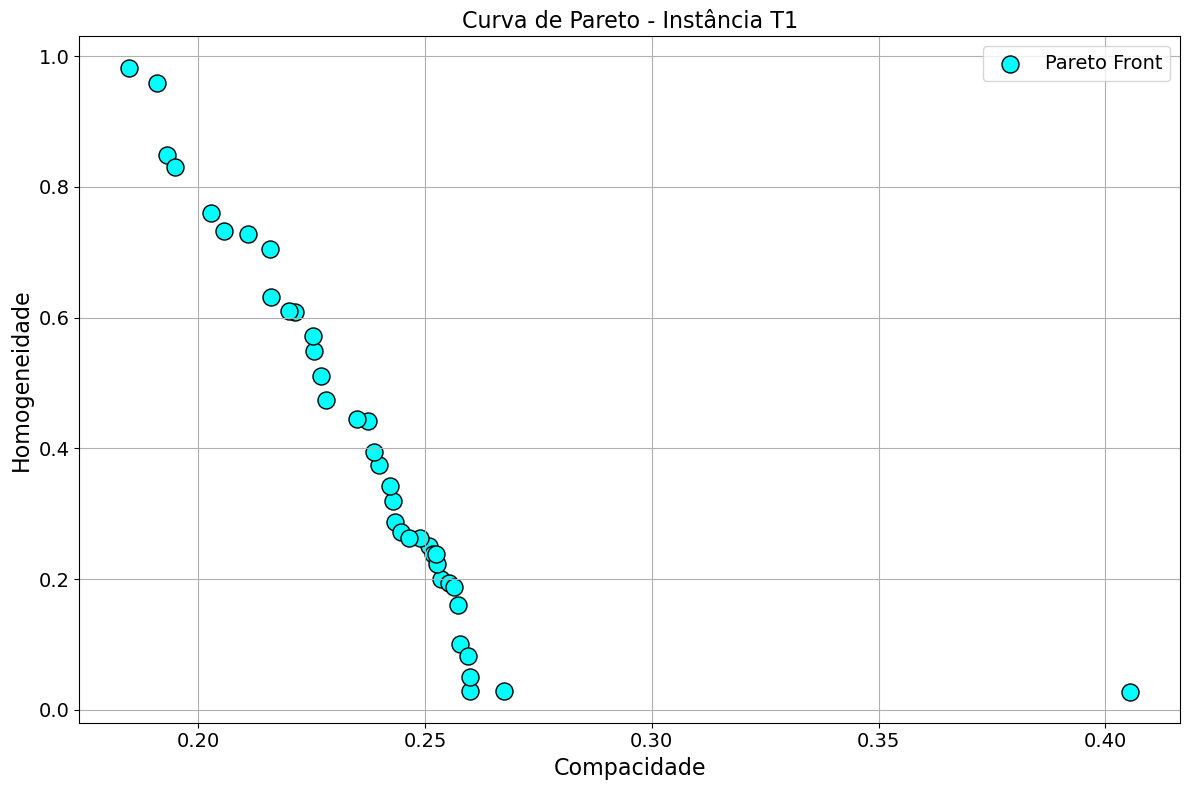

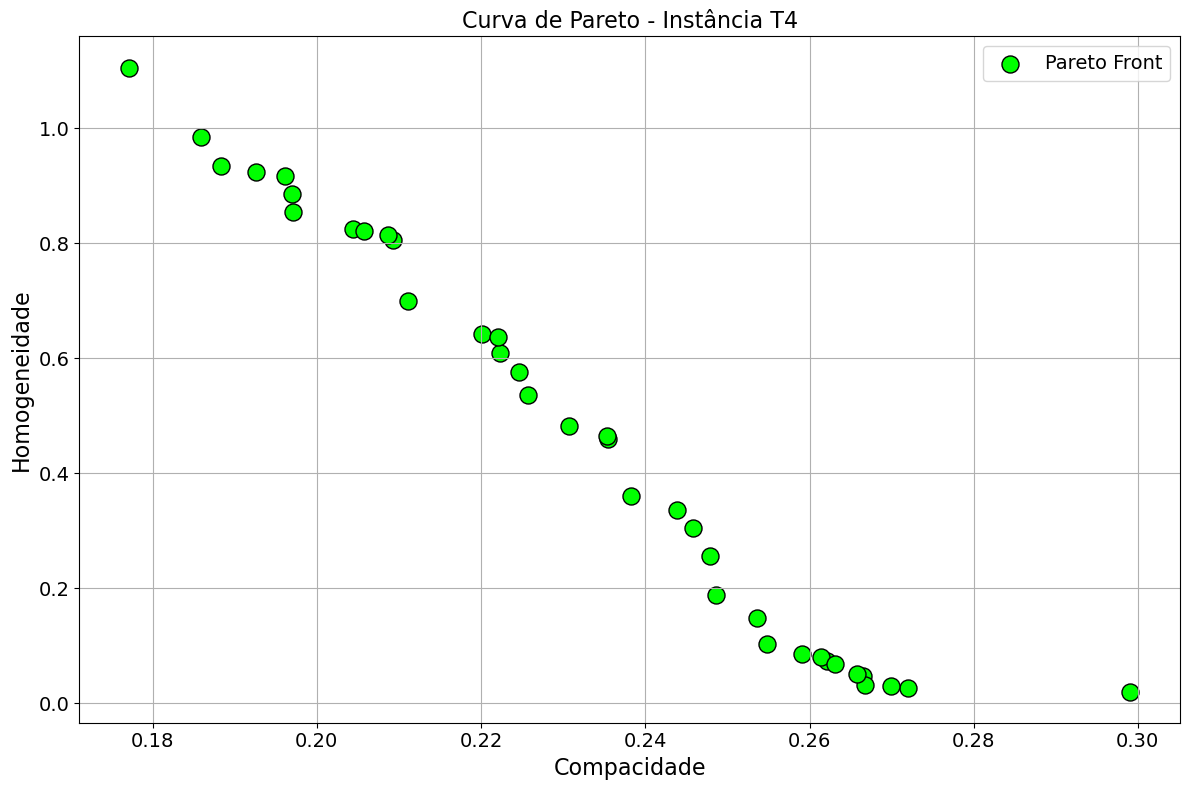

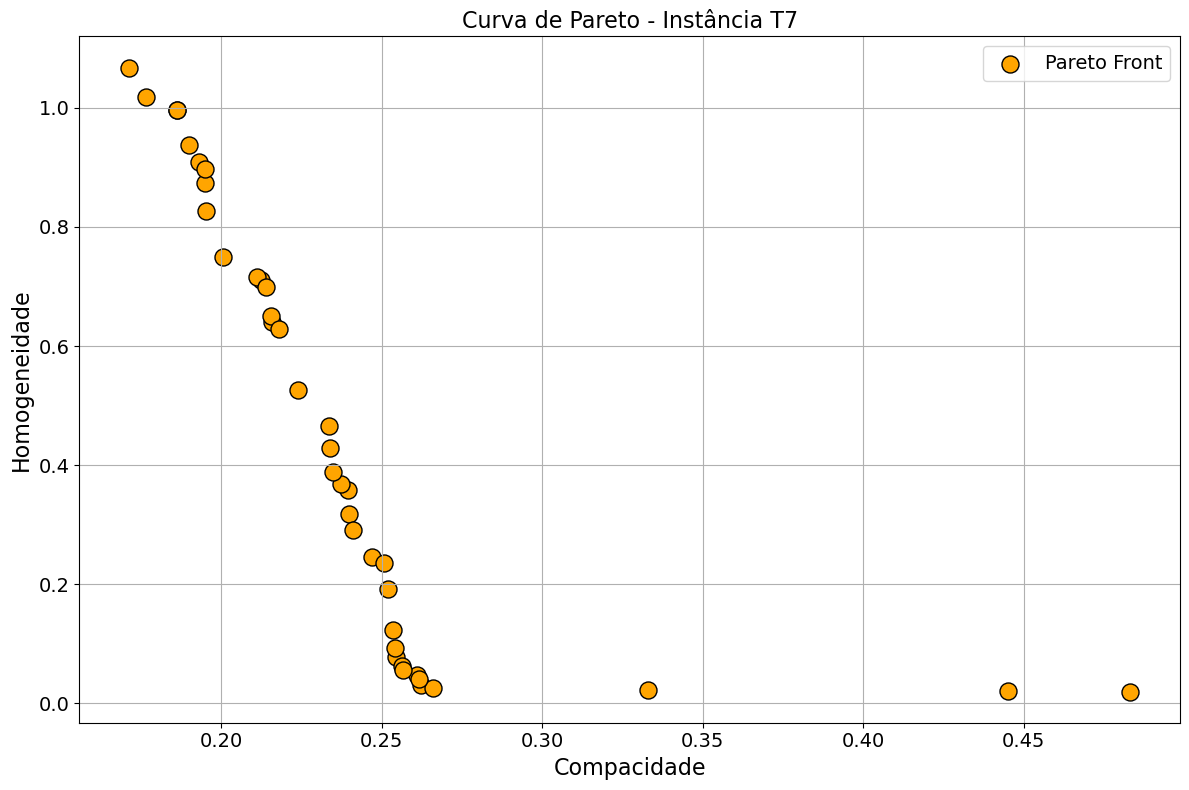

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def identify_pareto(df, objectives):
    is_dominated = np.zeros(len(df), dtype=bool)
    for i, row in df.iterrows():
        if not is_dominated[i]:
            dominated = (df[objectives[0]] <= row[objectives[0]]) & \
                        (df[objectives[1]] <= row[objectives[1]]) & \
                        ((df[objectives[0]] < row[objectives[0]]) | (df[objectives[1]] < row[objectives[1]]))
            is_dominated = is_dominated | dominated
    pareto_df = df[~is_dominated]
    return pareto_df


dados_T1 = [
    [0.405395507812500, 0.027915790677071],
    [0.259923100471497, 0.028889000415802],
    [0.267303675413132, 0.028376787900925],
    [0.257611125707626, 0.100957833230495],
    [0.259815156459808, 0.049531318247318],
    [0.225459575653076, 0.548225224018097],
    [0.243428587913513, 0.287250936031342],
    [0.242844909429550, 0.319213211536407],
    [0.250820457935333, 0.250012814998627],
    [0.257334917783737, 0.159760266542435],
    [0.244738221168518, 0.272601544857025],
    [0.248799696564674, 0.262306004762650],
    [0.228104427456856, 0.474568456411362],
    [0.259575307369232, 0.081749722361565],
    [0.246372759342194, 0.262510865926743],
    [0.251691907644272, 0.238436728715897],
    [0.253440111875534, 0.200020477175713],
    [0.215982854366302, 0.631204247474670],
    [0.255272090435028, 0.193566575646400],
    [0.215717971324921, 0.704809725284576],
    [0.237498834729195, 0.441889047622681],
    [0.184803426265717, 0.982533335685730],
    [0.235071778297424, 0.444245249032974],
    [0.252652317285538, 0.222353100776672],
    [0.239933550357819, 0.374071598052979],
    [0.221252903342247, 0.608820319175720],
    [0.220100551843643, 0.610817968845367],
    [0.242210194468498, 0.342467874288559],
    [0.225384220480919, 0.571428596973419],
    [0.190974146127701, 0.959022641181946],
    [0.256427347660065, 0.188495606184006],
    [0.193209335207939, 0.848384022712708],
    [0.205646350979805, 0.732827901840210],
    [0.202822446823120, 0.759924232959747],
    [0.227088004350662, 0.510372340679169],
    [0.238652914762497, 0.394662708044052],
    [0.194876730442047, 0.830251514911652],
    [0.252496182918549, 0.237770825624466],
    [0.210939496755600, 0.728269219398499],
]

dados_T4 = [
    [0.266483247280121, 0.046201910823584],
    [0.266760915517807, 0.030681759119034],
    [0.271973669528961, 0.026225477457047],
    [0.299030005931854, 0.019976437091827],
    [0.262146592140198, 0.072785936295986],
    [0.269920378923416, 0.028940225020051],
    [0.265730053186417, 0.050043534487486],
    [0.247820720076561, 0.255698412656784],
    [0.253624022006989, 0.147108539938927],
    [0.248604029417038, 0.188700512051582],
    [0.254837572574615, 0.102904260158539],
    [0.261440247297287, 0.080571629106998],
    [0.225737586617470, 0.535163640975952],
    [0.235455691814423, 0.460072755813599],
    [0.259084761142731, 0.085130356252193],
    [0.263156503438950, 0.067715004086494],
    [0.211045324802399, 0.698868036270142],
    [0.204397663474083, 0.824873268604279],
    [0.177150830626488, 1.105823874473572],
    [0.188304349780083, 0.934897303581238],
    [0.196936011314392, 0.885622024536133],
    [0.209277704358101, 0.805409073829651],
    [0.220059573650360, 0.641704678535461],
    [0.224659159779549, 0.576755642890930],
    [0.222348585724831, 0.609588682651520],
    [0.230761691927910, 0.481227248907089],
    [0.245750695466995, 0.303846746683121],
    [0.238236233592033, 0.359524637460709],
    [0.243829667568207, 0.336116373538971],
    [0.222063630819321, 0.636428713798523],
    [0.196107655763626, 0.916713595390320],
    [0.192533805966377, 0.923577308654785],
    [0.208606198430061, 0.814936161041260],
    [0.205693528056145, 0.821390151977539],
    [0.197087019681931, 0.853813469409943],
    [0.185846984386444, 0.984940707683563],
    [0.235359519720078, 0.464989989995956],
]

dados_T7 = [
    [0.483162164688110, 0.019944798201323],
    [0.445097297430038, 0.020465550944209],
    [0.333028435707092, 0.022131958976388],
    [0.262108147144318, 0.030828516930342],
    [0.266099631786346, 0.025985520333052],
    [0.260911822319031, 0.048013333231211],
    [0.254496961832047, 0.078060723841190],
    [0.256372153759003, 0.061969488859177],
    [0.239777117967606, 0.317190021276474],
    [0.246948197484016, 0.245951145887375],
    [0.215657263994217, 0.640108287334442],
    [0.252042651176453, 0.192522004246712],
    [0.212385207414627, 0.711347162723541],
    [0.253413796424866, 0.122532926499844],
    [0.256641775369644, 0.055876690894365],
    [0.261641830205917, 0.041608080267906],
    [0.239574730396271, 0.358016937971115],
    [0.254235804080963, 0.092329338192940],
    [0.240895792841911, 0.291048258543015],
    [0.215502277016640, 0.650991976261139],
    [0.217891871929169, 0.628703892230988],
    [0.237135007977486, 0.368379950523376],
    [0.194997325539589, 0.874498724937439],
    [0.171315446496010, 1.067541360855103],
    [0.234772711992264, 0.388845503330231],
    [0.186286285519600, 0.995938122272491],
    [0.176663190126419, 1.017236828804016],
    [0.195230856537819, 0.826693654060364],
    [0.186286285519600, 0.995938122272491],
    [0.211098060011864, 0.715877711772919],
    [0.189907178282738, 0.937301456928253],
    [0.213941663503647, 0.698380470275879],
    [0.200549066066742, 0.748841285705566],
    [0.233411937952042, 0.465187728404999],
    [0.193067505955696, 0.908295512199402],
    [0.233849048614502, 0.428370565176010],
    [0.223808452486992, 0.526948928833008],
    [0.250730693340302, 0.235796496272087],
    [0.194793522357941, 0.897307753562927],
]


df_T1 = pd.DataFrame(dados_T1, columns=['Compacidade', 'Homogeneidade'])
df_T4 = pd.DataFrame(dados_T4, columns=['Compacidade', 'Homogeneidade'])
df_T7 = pd.DataFrame(dados_T7, columns=['Compacidade', 'Homogeneidade'])

pareto_T1 = identify_pareto(df_T1, ['Compacidade', 'Homogeneidade'])
pareto_T4 = identify_pareto(df_T4, ['Compacidade', 'Homogeneidade'])
pareto_T7 = identify_pareto(df_T7, ['Compacidade', 'Homogeneidade'])

def increase_font_size(ax, fontsize=14):
    ax.title.set_fontsize(fontsize)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize-2)
    ax.legend(fontsize=fontsize-2)

plt.figure(figsize=(12, 8))
plt.scatter(df_T1['Compacidade'], df_T1['Homogeneidade'], s=50, alpha=0.6)
plt.scatter(pareto_T1['Compacidade'], pareto_T1['Homogeneidade'], s=150, label='Pareto Front', color='cyan', edgecolors='black')
plt.title('Curva de Pareto - Instância T4')
plt.xlabel('Compacidade')
plt.ylabel('Homogeneidade')
plt.legend()
plt.grid(True)
increase_font_size(plt.gca(), fontsize=16)
plt.tight_layout()
plt.savefig('T1.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(df_T4['Compacidade'], df_T4['Homogeneidade'], s=50, alpha=0.6)
plt.scatter(pareto_T4['Compacidade'], pareto_T4['Homogeneidade'], s=150, label='Pareto Front', color='lime', edgecolors='black')
plt.title('Curva de Pareto - Instância T1')
plt.xlabel('Compacidade')
plt.ylabel('Homogeneidade')
plt.legend()
plt.grid(True)
increase_font_size(plt.gca(), fontsize=16)
plt.tight_layout()
plt.savefig('T4.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(df_T7['Compacidade'], df_T7['Homogeneidade'], s=50, alpha=0.6)
plt.scatter(pareto_T7['Compacidade'], pareto_T7['Homogeneidade'], s=150, label='Pareto Front', color='orange', edgecolors='black')
plt.title('Curva de Pareto - Instância T7')
plt.xlabel('Compacidade')
plt.ylabel('Homogeneidade')
plt.legend()
plt.grid(True)
increase_font_size(plt.gca(), fontsize=16)
plt.tight_layout()
plt.savefig('T7.png', dpi=300)
plt.show()
